In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

CURRENT_DIR = os.getcwd()
BASE_DIR = os.path.dirname(CURRENT_DIR) # Bir üst dizin
DATA_PATH = os.path.join(BASE_DIR, 'data', 'processed', 'wildfire_data.parquet')

print(f" Veri yolu: {DATA_PATH}")
print(" Veri okunuyor (Parquet hızı)...")

# Veriyi oku
df = pd.read_parquet(DATA_PATH)

print(f" Veri Hazır! Toplam Satır: {len(df)}")
print(df.info())

 Veri yolu: /Users/memra/Desktop/Wildfire_AI_Project/data/processed/wildfire_data.parquet
 Veri okunuyor (Parquet hızı)...
 Veri Hazır! Toplam Satır: 1880465
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1880465 entries, 0 to 1880464
Data columns (total 8 columns):
 #   Column            Dtype         
---  ------            -----         
 0   FIRE_YEAR         int16         
 1   DISCOVERY_DATE    datetime64[ns]
 2   STAT_CAUSE_DESCR  object        
 3   LATITUDE          float64       
 4   LONGITUDE         float64       
 5   STATE             object        
 6   FIRE_SIZE         float64       
 7   FIRE_SIZE_CLASS   object        
dtypes: datetime64[ns](1), float64(3), int16(1), object(3)
memory usage: 104.0+ MB
None


/var/folders/g7/79160ktd5rz2zv_pl2fdc4xr0000gn/T/ipykernel_27355/2035087227.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='FIRE_SIZE_CLASS', data=df, order=order_list, palette='Reds')


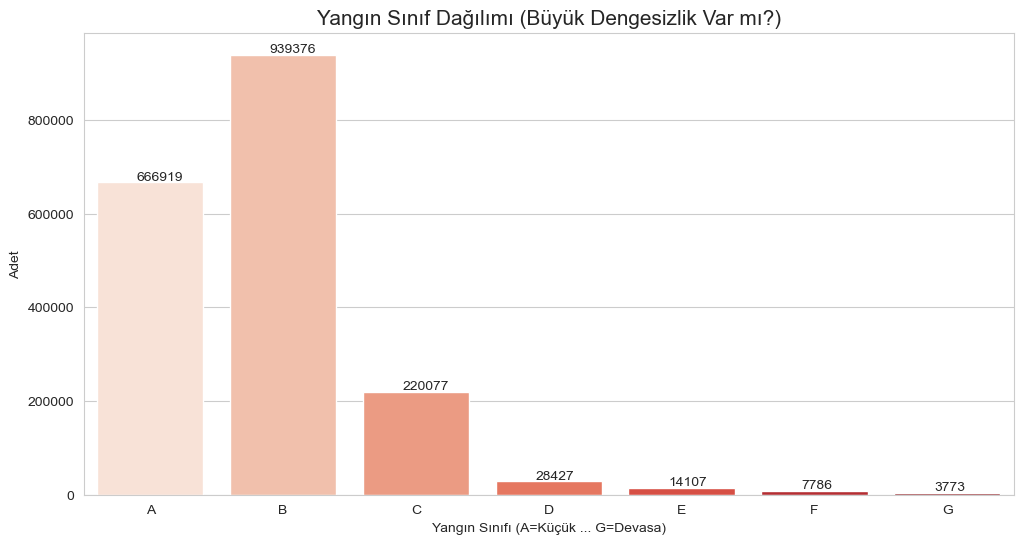

Sınıf Oranları (%):
FIRE_SIZE_CLASS
A    35.465643
B    49.954453
C    11.703329
D     1.511701
E     0.750187
F     0.414047
G     0.200642
Name: proportion, dtype: float64


In [2]:
plt.figure(figsize=(12, 6))

# Yangın sınıf dağılımı
order_list = sorted(df['FIRE_SIZE_CLASS'].unique())

ax = sns.countplot(x='FIRE_SIZE_CLASS', data=df, order=order_list, palette='Reds')

plt.title('Yangın Sınıf Dağılımı (Büyük Dengesizlik Var mı?)', fontsize=15)
plt.xlabel('Yangın Sınıfı (A=Küçük ... G=Devasa)')
plt.ylabel('Adet')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + 0.3, p.get_height() + 5000))

plt.show()

print("Sınıf Oranları (%):")
print((df['FIRE_SIZE_CLASS'].value_counts(normalize=True) * 100).sort_index())

/var/folders/g7/79160ktd5rz2zv_pl2fdc4xr0000gn/T/ipykernel_27355/1111043033.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='MONTH', data=df, palette='autumn', ax=axes[1])


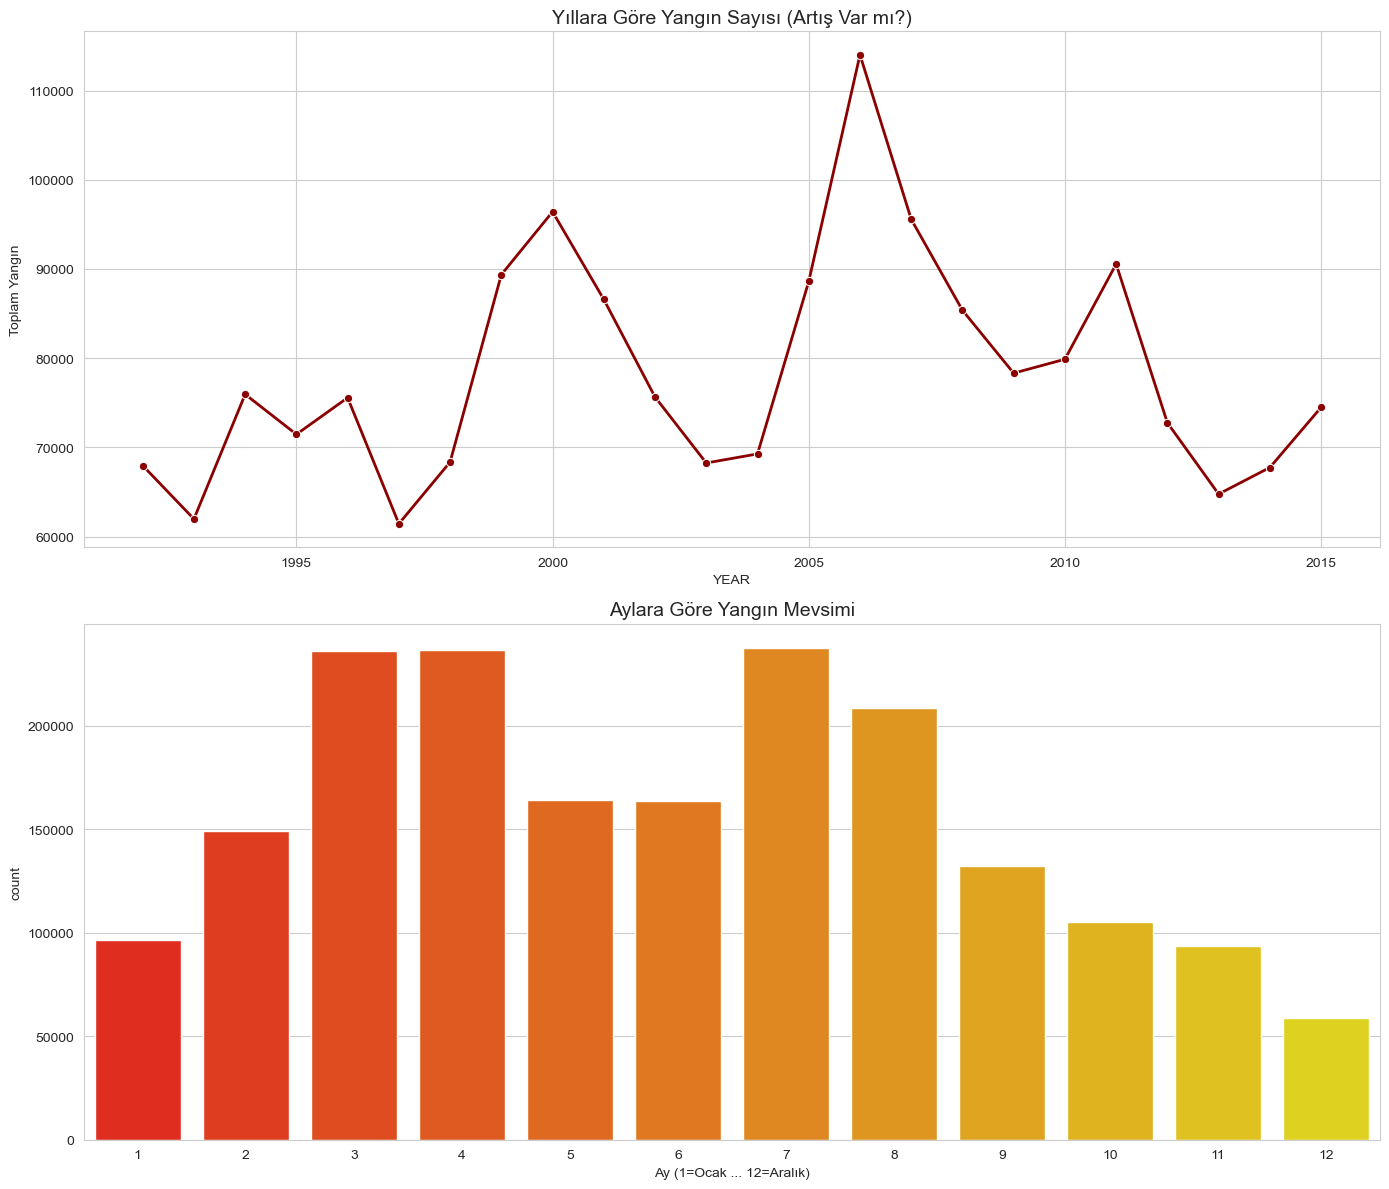

In [3]:
# Tarih sütununu datetime yapalım
df['DISCOVERY_DATE'] = pd.to_datetime(df['DISCOVERY_DATE'])

# Yıl ve Ay türetelim
df['YEAR'] = df['DISCOVERY_DATE'].dt.year
df['MONTH'] = df['DISCOVERY_DATE'].dt.month

fig, axes = plt.subplots(2, 1, figsize=(14, 12))

# 1. Yıllık Trend
sns.lineplot(data=df['YEAR'].value_counts().sort_index(), ax=axes[0], marker='o', color='darkred', linewidth=2)
axes[0].set_title('Yıllara Göre Yangın Sayısı (Artış Var mı?)', fontsize=14)
axes[0].set_ylabel('Toplam Yangın')

# 2. Aylık Mevsimsellik
sns.countplot(x='MONTH', data=df, palette='autumn', ax=axes[1])
axes[1].set_title('Aylara Göre Yangın Mevsimi', fontsize=14)
axes[1].set_xlabel('Ay (1=Ocak ... 12=Aralık)')

plt.tight_layout()
plt.show()

/var/folders/g7/79160ktd5rz2zv_pl2fdc4xr0000gn/T/ipykernel_27355/3563235145.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_causes.values, y=top_causes.index, palette='viridis')


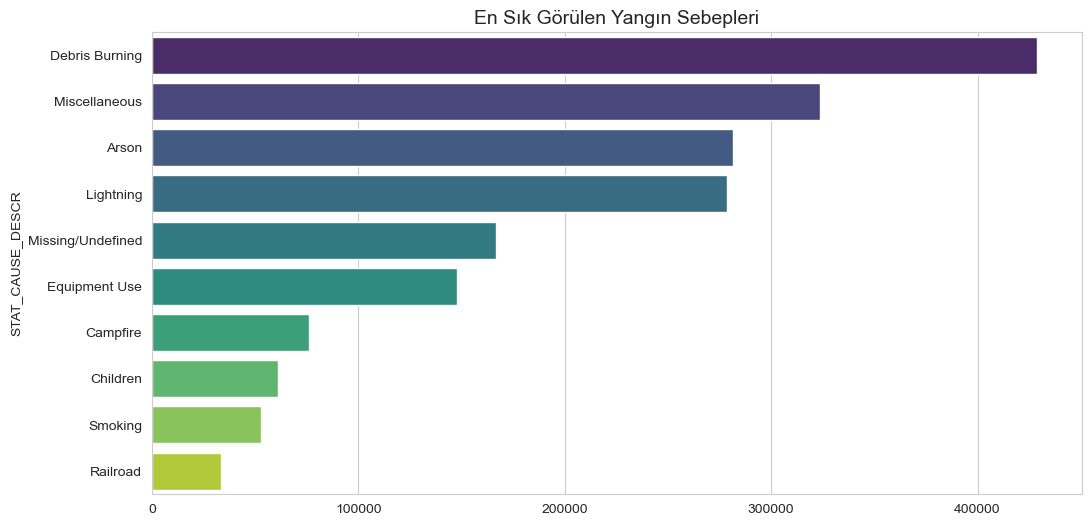

/var/folders/g7/79160ktd5rz2zv_pl2fdc4xr0000gn/T/ipykernel_27355/3563235145.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_burn.index, y=avg_burn.values, palette='magma')


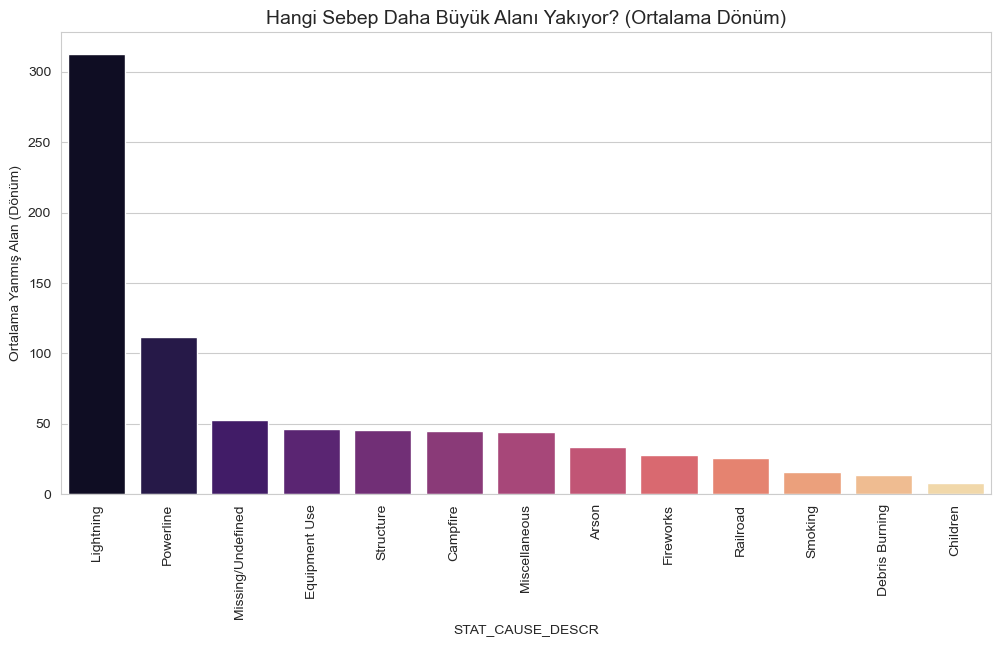

In [4]:
# 1. En Çok Görülen 10 Sebep
plt.figure(figsize=(12, 6))
top_causes = df['STAT_CAUSE_DESCR'].value_counts().head(10)
sns.barplot(x=top_causes.values, y=top_causes.index, palette='viridis')
plt.title('En Sık Görülen Yangın Sebepleri', fontsize=14)
plt.show()

# 2. Sebebe Göre ORTALAMA Yangın Büyüklüğü 
plt.figure(figsize=(12, 6))
avg_burn = df.groupby('STAT_CAUSE_DESCR')['FIRE_SIZE'].mean().sort_values(ascending=False)
sns.barplot(x=avg_burn.index, y=avg_burn.values, palette='magma')
plt.xticks(rotation=90)
plt.title('Hangi Sebep Daha Büyük Alanı Yakıyor? (Ortalama Dönüm)', fontsize=14)
plt.ylabel('Ortalama Yanmış Alan (Dönüm)')
plt.show()

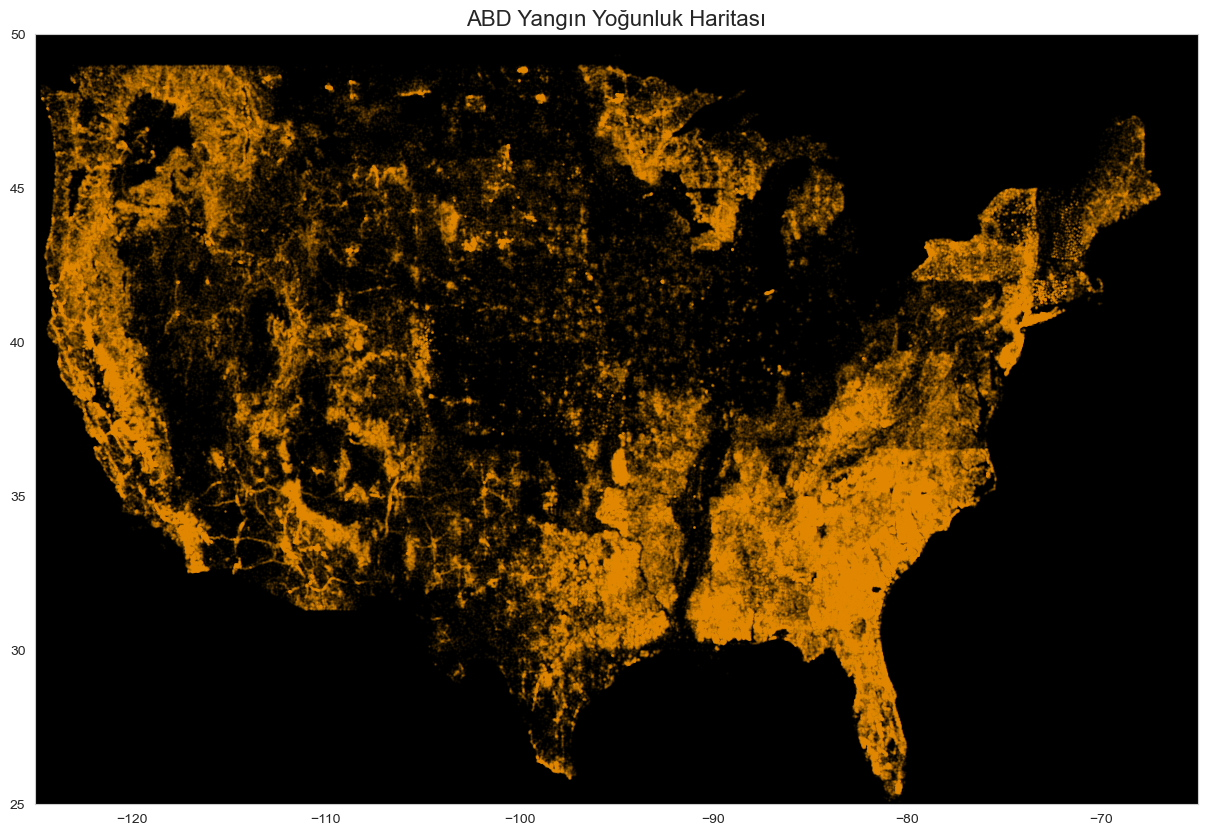

In [5]:
plt.figure(figsize=(15, 10))

plt.scatter(x=df['LONGITUDE'], y=df['LATITUDE'], 
            alpha=0.03, s=1, c='orange')

plt.title('ABD Yangın Yoğunluk Haritası', fontsize=16)
plt.xlim(-125, -65) # ABD sınırları
plt.ylim(25, 50)
plt.gca().set_facecolor('black') 
plt.grid(False)

plt.show()

In [6]:
# 1. GENEL BAKIŞ 
print("--- 1. GENEL BİLGİ (INFO) ---")
print(df.info())
print("\n" + "-"*50 + "\n")

# 2. EKSİK VERİ ANALİZİ 
print("--- 2. BOŞ DEĞER SAYILARI (NULL CHECK) ---")
null_counts = df.isnull().sum()
print(null_counts[null_counts > 0])
print("\n" + "-"*50 + "\n")

# 3. İSTATİSTİKSEL ÖZET
print("--- 3. SAYISAL İSTATİSTİKLER (DESCRIBE) ---")
print(df.describe().T)
print("\n" + "-"*50 + "\n")

# 4. KATEGORİK ÖZET
print("--- 4. KATEGORİK DEĞİŞKENLER ---")
cat_cols = df.select_dtypes(include=['object', 'category']).columns
if len(cat_cols) > 0:
    print(df[cat_cols].describe().T)
else:
    print("Kategorik kolon bulunamadı.")
print("\n" + "-"*50 + "\n")

# 5. KATEGORİK ÇEŞİTLİLİK
print("--- 5. KAÇ FARKLI DEĞER VAR? (NUNIQUE) ---")
print(df.nunique())

--- 1. GENEL BİLGİ (INFO) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1880465 entries, 0 to 1880464
Data columns (total 10 columns):
 #   Column            Dtype         
---  ------            -----         
 0   FIRE_YEAR         int16         
 1   DISCOVERY_DATE    datetime64[ns]
 2   STAT_CAUSE_DESCR  object        
 3   LATITUDE          float64       
 4   LONGITUDE         float64       
 5   STATE             object        
 6   FIRE_SIZE         float64       
 7   FIRE_SIZE_CLASS   object        
 8   YEAR              int32         
 9   MONTH             int32         
dtypes: datetime64[ns](1), float64(3), int16(1), int32(2), object(3)
memory usage: 118.4+ MB
None

--------------------------------------------------

--- 2. BOŞ DEĞER SAYILARI (NULL CHECK) ---
Series([], dtype: int64)

--------------------------------------------------

--- 3. SAYISAL İSTATİSTİKLER (DESCRIBE) ---
                    count                           mean                  min  \
FIRE